##Forecasting Altman Z Score

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [2]:
# Import our input dataset
companies_df = pd.read_csv("All.csv")
companies_df.head()

,sector,Name,symbol,code,year,Current ratio,Quick Ratio,Cash ratio,Operating cash flow ratio,Working capital ratio,...,EV / EBIT,EV / Free Cash Flow,EV / Invested Capital,EV / Revenue,P/E Ratio,Price/Book,Dividend Per Share,Altman Z-Score,Piotroski Score,Classification
0,Academic & Education,Global Education Communities,GEC,A&E 01,2013,0.63,0.61,0.20,-0.10,0.63,...,-6.2x,-4.0x,0.9x,0.9x,-5.9x,1.1x,0.0,-3.1,0,0
1,Academic & Education,Global Education Communities,GEC,A&E 01,2014,0.78,0.76,0.16,-0.25,0.78,...,-9.0x,-2.6x,0.7x,0.5x,-14.3x,1.0x,0.0,-0.9,6,0
2,Academic & Education,Global Education Communities,GEC,A&E 01,2015,0.27,0.26,0.05,0.08,0.27,...,-22.7x,16.6x,1.0x,1.9x,-18.7x,1.1x,0.0,-0.7,4,0
3,Academic & Education,Global Education Communities,GEC,A&E 01,2016,0.76,0.73,0.27,-0.04,0.76,...,54.3x,84.6x,1.1x,2.4x,6.4x,1.5x,0.0,2.9,4,1
4,Academic & Education,Global Education Communities,GEC,A&E 01,2017,0.32,0.31,0.12,0.18,0.32,...,162.1x,28.4x,1.2x,3.4x,30.6x,1.8x,0.0,1.9,4,1


In [3]:
# Replacing x suffix from the DataFrame

columns_with_x = ['EV/EBITDA', 'EV / EBIT', 'EV / Free Cash Flow',
                    'EV / Invested Capital', 'EV / Revenue', 'P/E Ratio', 'Price/Book']

# Function to remove 'x' and convert to numeric
def remove_x_convert_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(value.replace('x', ''), errors='coerce')
    return value

# Apply the function to the specified columns
for column in columns_with_x:
    companies_df[column] = companies_df[column].apply(remove_x_convert_numeric)

In [4]:
print(companies_df.shape)
companies_df.head()

(1781, 38)


,sector,Name,symbol,code,year,Current ratio,Quick Ratio,Cash ratio,Operating cash flow ratio,Working capital ratio,...,EV / EBIT,EV / Free Cash Flow,EV / Invested Capital,EV / Revenue,P/E Ratio,Price/Book,Dividend Per Share,Altman Z-Score,Piotroski Score,Classification
0,Academic & Education,Global Education Communities,GEC,A&E 01,2013,0.63,0.61,0.20,-0.10,0.63,...,-6.2,-4.0,0.9,0.9,-5.9,1.1,0.0,-3.1,0,0
1,Academic & Education,Global Education Communities,GEC,A&E 01,2014,0.78,0.76,0.16,-0.25,0.78,...,-9.0,-2.6,0.7,0.5,-14.3,1.0,0.0,-0.9,6,0
2,Academic & Education,Global Education Communities,GEC,A&E 01,2015,0.27,0.26,0.05,0.08,0.27,...,-22.7,16.6,1.0,1.9,-18.7,1.1,0.0,-0.7,4,0
3,Academic & Education,Global Education Communities,GEC,A&E 01,2016,0.76,0.73,0.27,-0.04,0.76,...,54.3,84.6,1.1,2.4,6.4,1.5,0.0,2.9,4,1
4,Academic & Education,Global Education Communities,GEC,A&E 01,2017,0.32,0.31,0.12,0.18,0.32,...,162.1,28.4,1.2,3.4,30.6,1.8,0.0,1.9,4,1


In [5]:
# Define the Columns to Convert to float
columns_to_convert = [
    'Interest coverage ratio',
    'The Long-Term Debt Coverage Ratio',
    'Total debt to EBITDA ratio',
    'Inventory turnover ratio',
    'Receivables turnover ratio',
    'Working capital turnover ratio',
    'EBITDA'
]

def convert_to_float(df, columns):
    for column in columns:
        # Remove commas and convert to float
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Apply the conversion function to the DataFrame
convert_to_float(companies_df, columns_to_convert)


In [6]:
# Drop columns from the DataFrame
companies_df.drop(columns=['sector', 'symbol', 'code',
'Current ratio',
"Net profit margin",
'Operating cash flow ratio',
'Equity Ratio',
'Debt to equity ratio',
'The Long-Term Debt Coverage Ratio',
'Asset Turnover Ratio',
'EBITDA',
'EV / EBIT',
'EV / Free Cash Flow',
'EV / Revenue',
'P/E Ratio',
'Price/Book',
'Dividend Per Share',], inplace=True)

In [7]:
companies_df.columns

Index(['Name', 'year', 'Quick Ratio', 'Cash ratio', 'Working capital ratio',
       'Return On Equity (ROE)', 'Sales turnover ratio',
       'Return On Assets (ROA)', 'EPS', 'Debt-to-assets ratio',
       'Interest coverage ratio', 'Total debt to EBITDA ratio',
       'Cash flow to debt ratio', 'Inventory turnover ratio',
       'Receivables turnover ratio', 'Working capital turnover ratio',
       'EV/EBITDA', 'EV / Invested Capital', 'Altman Z-Score',
       'Piotroski Score', 'Classification'],
      dtype='object')

In [8]:
companies_df.isna().sum()

Name                              0
year                              0
Quick Ratio                       0
Cash ratio                        0
Working capital ratio             0
Return On Equity (ROE)            0
Sales turnover ratio              0
Return On Assets (ROA)            0
EPS                               0
Debt-to-assets ratio              0
Interest coverage ratio           0
Total debt to EBITDA ratio        0
Cash flow to debt ratio           0
Inventory turnover ratio          0
Receivables turnover ratio        0
Working capital turnover ratio    0
EV/EBITDA                         6
EV / Invested Capital             0
Altman Z-Score                    0
Piotroski Score                   0
Classification                    0
dtype: int64

In [9]:
companies_df.dropna(axis='index', inplace=True)
print(companies_df.shape)
companies_df.head()

(1775, 21)


,Name,year,Quick Ratio,Cash ratio,Working capital ratio,Return On Equity (ROE),Sales turnover ratio,Return On Assets (ROA),EPS,Debt-to-assets ratio,...,Total debt to EBITDA ratio,Cash flow to debt ratio,Inventory turnover ratio,Receivables turnover ratio,Working capital turnover ratio,EV/EBITDA,EV / Invested Capital,Altman Z-Score,Piotroski Score,Classification
0,Global Education Communities,2013,0.61,0.20,0.63,-0.1244,0.7228,-0.0373,-0.032,0.6541,...,-18.46,-0.06,33.57,4.63,-4.52,-13.7,0.9,-3.1,0,0
1,Global Education Communities,2014,0.76,0.16,0.78,0.2191,0.7415,0.1274,-0.028,0.4352,...,-15.33,-0.24,31.24,4.22,-8.18,-82.4,0.7,-0.9,6,0
2,Global Education Communities,2015,0.26,0.05,0.27,0.0288,0.3989,0.0744,0.016,0.5522,...,64.40,0.07,27.31,4.03,-1.02,-40.0,1.0,-0.7,4,0
3,Global Education Communities,2016,0.73,0.27,0.76,0.0711,0.3529,0.0900,0.057,0.4632,...,-89.90,-0.01,46.20,5.31,-9.04,33.8,1.1,2.9,4,1
4,Global Education Communities,2017,0.31,0.12,0.32,0.0310,0.3209,0.0496,0.033,0.5388,...,19.86,0.12,41.31,5.78,-1.32,84.0,1.2,1.9,4,1


In [10]:
# Convert categorical data to numeric using one-hot encoding
dummies_companies_df = pd.get_dummies(companies_df, dtype=int)

In [11]:
# Splitting the data into features and target
y = dummies_companies_df['Altman Z-Score']
X = dummies_companies_df.drop(columns='Altman Z-Score')

In [12]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Instantiate and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

In [15]:
r2_score(y_test, lr_predictions)

0.5006895488441987

In [16]:
lr_model.score(X_test, y_test)

0.5006895488441987

In [17]:
y_test[0:5]

66      5.4
1099    3.1
1029    6.4
343     6.3
558     9.0
Name: Altman Z-Score, dtype: float64

In [18]:
lr_predictions[0:5]

array([ 6.29631042,  2.59674454,  5.06772232,  6.1705513 , 10.0279007 ])

In [19]:
# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Alternatively, compute relevant metrics separately
mse = lr_mse
rmse = np.sqrt(mse)
std = np.std(lr_predictions - y_test)

# Print evaluation results
print("Linear Regression MAE:", lr_mae)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)
print(f"The score is {lr_r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


Linear Regression MAE: 4.812587736318777
Linear Regression MSE: 400.5014892513315
Linear Regression R-squared: 0.5006895488441987
The score is 0.5006895488441987.
The mean squared error is 400.5014892513315.
The root mean squared error is 20.01253330419044.
The standard deviation is 19.908970017566023.


In [20]:
predictions = lr_model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,6.296310,5.4
1,2.596745,3.1
2,5.067722,6.4
3,6.170551,6.3
4,10.027901,9.0
5,3.771595,6.3
6,5.074135,5.0
7,3.256924,2.5
8,10.911896,10.4
9,12.184124,10.2


In [21]:
# Importing the pickle module for object serialization
import pickle

with open('logreg.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

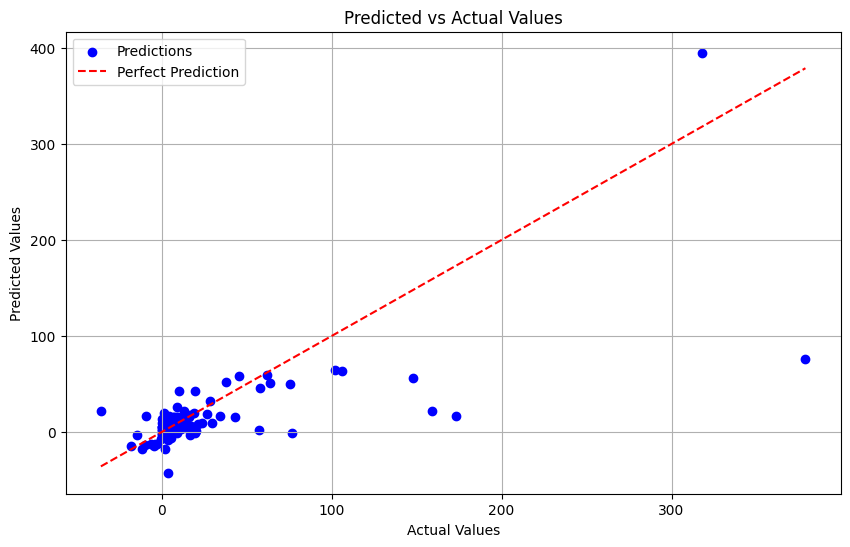

In [22]:
import matplotlib.pyplot as plt

# Extracting predicted and actual values
predicted_values = results['Prediction']
actual_values = results['Actual']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Predictions')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
# Save the plot as a PNG image
plt.savefig('predicted_vs_actual.png')

# Show the plot
plt.show()
